# Folder

```sql
CREATE TABLE folders(
    id   BIGINT      NOT NULL,
    name VARCHAR(50) NOT NULL,
    CONSTRAINT folders_pk PRIMARY KEY (id)
);

```
## solution_folders table
| id | name |
|----|------|
| 1 | People Space|
| 2 | India|
| 3 | Global|
| 4 | CSR India|
| 5 | Talent Acquisition|
| 6 | Employee Experience|
| 7 | Total Rewards|
| 8 | Employee Benefits|
| 9 | Timeoff|
| 10 | Online Doctor Consultation|
| 11 | Daycare program|
| 12 | Holidays|
| 13 | Practo|
| 14 | Medibuddy|
| 15 | Holiday calendar 2023|
| 16 | IT BU|
| 17 | Freddy|
| 18 | Engineering|
| 19 | Tech Design |
| 20 | Virtual Agent|
| 21 | Q2C|


## Folder Hierarchy

### Step 1 - Create a Graph

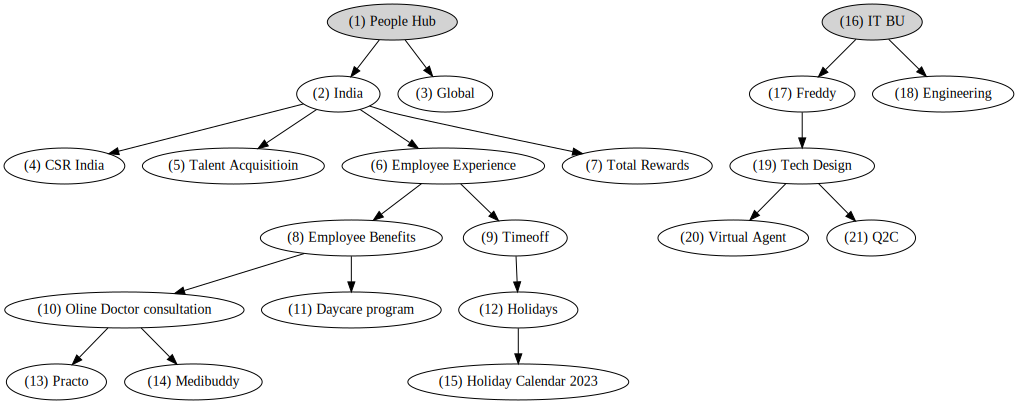

In [3]:
# import graph visualization
import graphviz

# define graph
folder_data = '''
digraph Folders {
    
    // Root folder 1
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]
    
    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    

    //Color codes
    ps [fillcolor=lightgrey, style=filled]
    
    // Root folder 2
    itb [label="(16) IT BU"]
    fre [label="(17) Freddy"]
    eng [label="(18) Engineering"]
    td [label="(19) Tech Design"]
    va [label="(20) Virtual Agent"]
    q2c [label="(21) Q2C"]

    itb [fillcolor=lightgrey, style=filled]
    itb -> fre -> td
    td -> va
    td -> q2c
    itb -> eng
}
'''
folders = graphviz.Source(folder_data)
folders


# Folder Graph representation in MySQL

Maintain a separate table called `kbase_folder_hierarchy` to store the folder hierarchy

- Create an edge from each vertex pointing to `self` -- this gives tree height as `0` --
- Create a Parent child entry for each immediate child -- this gives the tree height as `1` --



### Create Hierarchy table

```sql
CREATE TABLE IF NOT EXISTS kbase_hierarchy
(
    parent_id BIGINT NOT NULL,
    child_id  BIGINT NOT NULL,
    length    int    NOT NULL,
    CONSTRAINT kbase_hierarchy_pk
        PRIMARY KEY (parent_id, child_id),
    CONSTRAINT kbase_hierarchy_child_fk
        FOREIGN KEY (child_id) REFERENCES folders (id),
    CONSTRAINT kbase_hierarchy_parent_fk
        FOREIGN KEY (parent_id) REFERENCES folders (id)
);

CREATE INDEX ix_kbase_hierarchy ON kbase_hierarchy (parent_id, child_id, length);
CREATE INDEX ix_kbase_child_hierarchy ON kbase_hierarchy (child_id, length);

```


| parent | child | height | 
|----------|------------|--------|
| 1| 1| 0 |
| 1 | 2| 1 |
| 1| 3| 1|
| 2| 2| 0 |
| 2 | 4| 1 |
| 2 | 5| 1 |
| 2 | 6| 1|
| 2 | 7| 1|
| 3| 3| 0|
| 4| 4| 0|
| 5| 5| 0|
| 6| 6| 0|
| 6| 8| 1|
| 6| 9| 1|
| 7| 7| 0|
| 8| 8| 0|
| 8| 10| 1|
| 8| 11| 1|
| 9| 9| 0|
| 9| 12| 1|
| 10| 10| 0|
| 10| 13| 1|
| 10| 14| 1|
| 11| 11| 0|
| 12| 12| 0|
| 12| 15| 1|
| 13| 13| 0|
| 14| 14| 0|
| 15| 15| 0|
| 16| 16| 0|
| 16| 17| 1|
| 16| 18| 1|
| 17| 17| 0|
| 17| 19| 1|
| 18| 18| 0|
| 19| 19| 0|
| 19| 20| 1|
| 19| 21| 1|
| 20| 20| 0|
| 21| 21| 0|

- The above hierarchy representation gives ability to query the `immediate child` & `immediate parent`

### Step 2 - Create Edges to all descendents in tree

- From each Vertices, create an edge to all the descendents in its tree

#### Step 2.1 Create Edges to Descendents of "People Space"

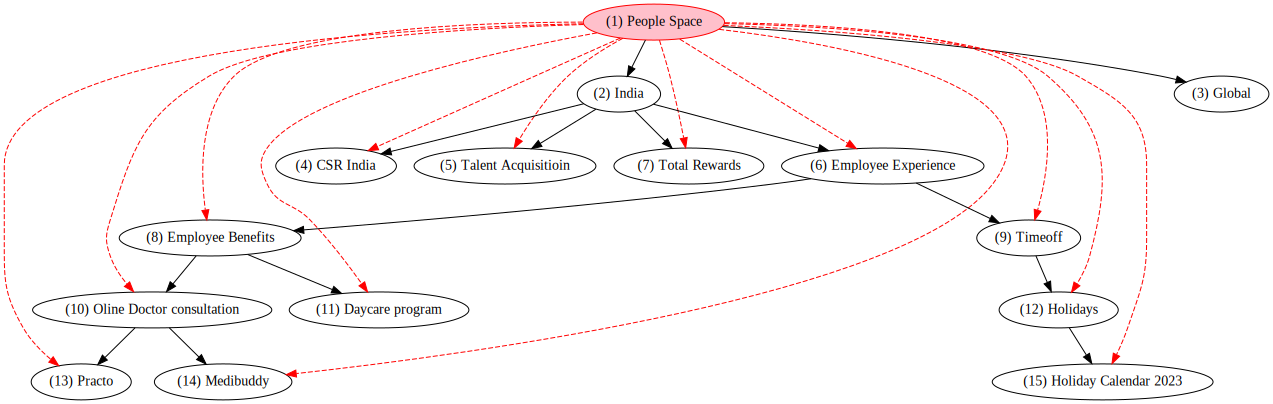

In [5]:
people_space = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]
    
    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    
    //Color codes
    ps [color = red, fillcolor=pink, style=filled]

    //Create Edge to all descendents of "People Space"
    ps -> csr [color="red", style="dashed"]
    ps -> ta [color="red", style="dashed"]
    ps -> ee [color="red", style="dashed"]
    ps -> eb [color="red", style="dashed"]
    ps -> odc [color="red", style="dashed"]
    ps -> prc [color="red", style="dashed"]
    ps -> tr [color="red", style="dashed"]
    ps -> dp [color="red", style="dashed"]
    ps -> tof [color="red", style="dashed"]
    ps -> hol [color="red", style="dashed"]
    ps -> hc [color="red", style="dashed"]
    ps -> mb [color="red", style="dashed"]
    
}
'''
ps_hierarchy = graphviz.Source(people_space)
ps_hierarchy

#### Step 2.2 Create Edges to Descendents of "India"

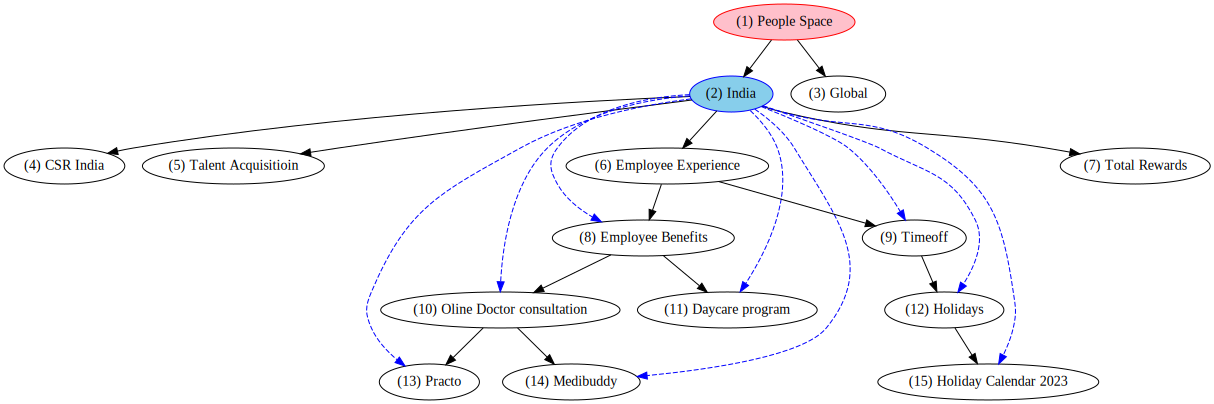

In [6]:
india = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]
    
    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    
    //Color codes
    ps [color = red, fillcolor=pink, style=filled]

    //Create Edge to all descendents of "India"
    ind [color = blue, fillcolor=skyblue, style=filled]

    ind -> eb [color="blue", style="dashed"]
    ind -> tof [color="blue", style="dashed"]
    ind -> odc [color="blue", style="dashed"]
    ind -> dp [color="blue", style="dashed"]
    ind -> hol [color="blue", style="dashed"]
    ind -> prc [color="blue", style="dashed"]
    ind -> mb [color="blue", style="dashed"]
    ind -> hc [color="blue", style="dashed"]
    
}
'''
ind_hierarchy = graphviz.Source(india)
ind_hierarchy


#### Step 2.3 Create Edges to Descendents of "Employee Experience"

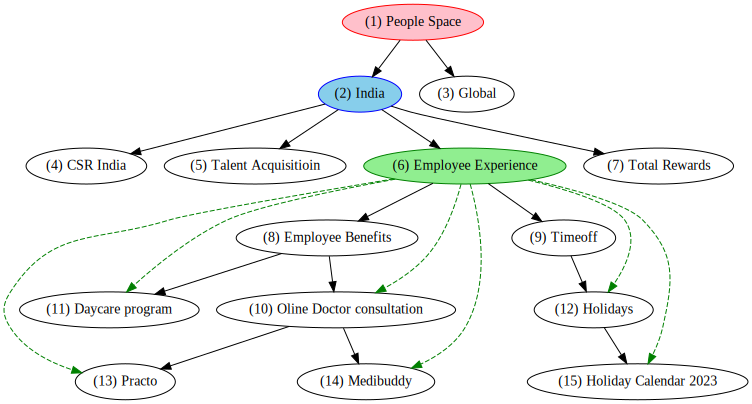

In [7]:
ex = '''
digraph Folders {
    
    // Root folder 1 -
    
    // Root folder 1
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]
    
    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    
    //Color codes
    ps [color = red, fillcolor=pink, style=filled]


    //Create Edge to all descendents of "India"
    ind [color = blue, fillcolor=skyblue, style=filled]

    //Create Edge to all descendents of "Employee Experience"
    ee [color = green, fillcolor=lightgreen, style=filled]

    ee -> odc [color="green", style="dashed"]
    ee -> dp [color="green", style="dashed"]
    ee -> hol [color="green", style="dashed"]
    ee -> prc [color="green", style="dashed"]
    ee -> mb [color="green", style="dashed"]
    ee -> hc [color="green", style="dashed"]
    
}
'''
ex_hierarchy = graphviz.Source(ex)
ex_hierarchy


#### Step 2.4 Create Edges to Descendents of "Employee Benefits"

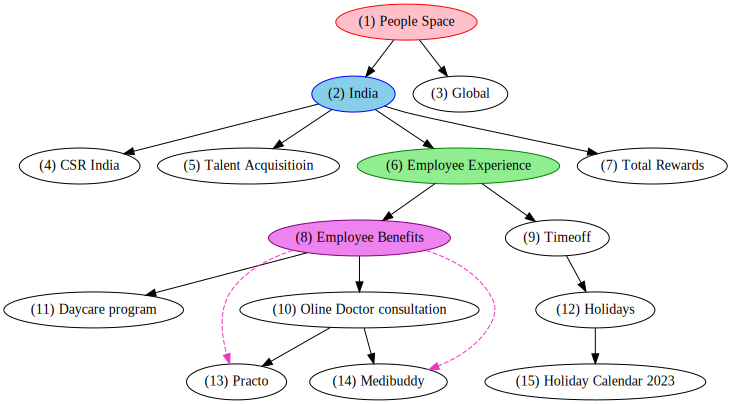

In [8]:
eb = '''
digraph Folders {
    
    // Root folder 1 -
    
    // Root folder 1
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]
    
    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    
    //Color codes
    ps [color = red, fillcolor=pink, style=filled]

    //Create Edge to all descendents of "India"
    ind [color = blue, fillcolor=skyblue, style=filled]

    //Create Edge to all descendents of "Employee Experience"
    ee [color = green, fillcolor=lightgreen, style=filled]
    
    //Create Edge to all descendents of "Employee Benefits"
    eb [color = purple, fillcolor=violet, style=filled]

    eb -> prc [color="#eb34c3", style="dashed"]
    eb -> mb [color="#eb34c3", style="dashed"]

    
}
'''
eb_hierarchy = graphviz.Source(eb)
eb_hierarchy


#### Step 2.5 Create Edges to Descendents of "Timeoff"

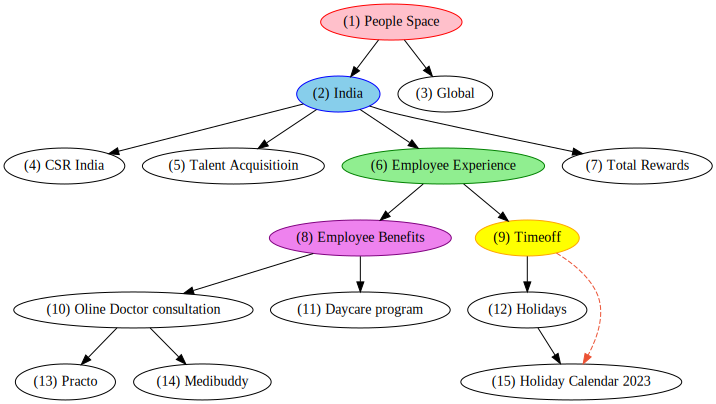

In [9]:
folder_hierarchy = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]
    
    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    
    //Color codes
    ps [color = red, fillcolor=pink, style=filled]

    //Create Edge to all descendents of "India"
    ind [color = blue, fillcolor=skyblue, style=filled]

    //Create Edge to all descendents of "Employee Experience"
    ee [color = green, fillcolor=lightgreen, style=filled]
    
    //Create Edge to all descendents of "Employee Benefits"
    eb [color = purple, fillcolor=violet, style=filled]

    //Create Edge to all descendents of "Timeoff"
    tof [color = orange, fillcolor=yellow, style=filled]

    tof -> hc [color="#eb5234", style="dashed"]
    
}
'''
hierarchy = graphviz.Source(folder_hierarchy)
hierarchy


### Final Hierarchy

#### Final mapping - Graph

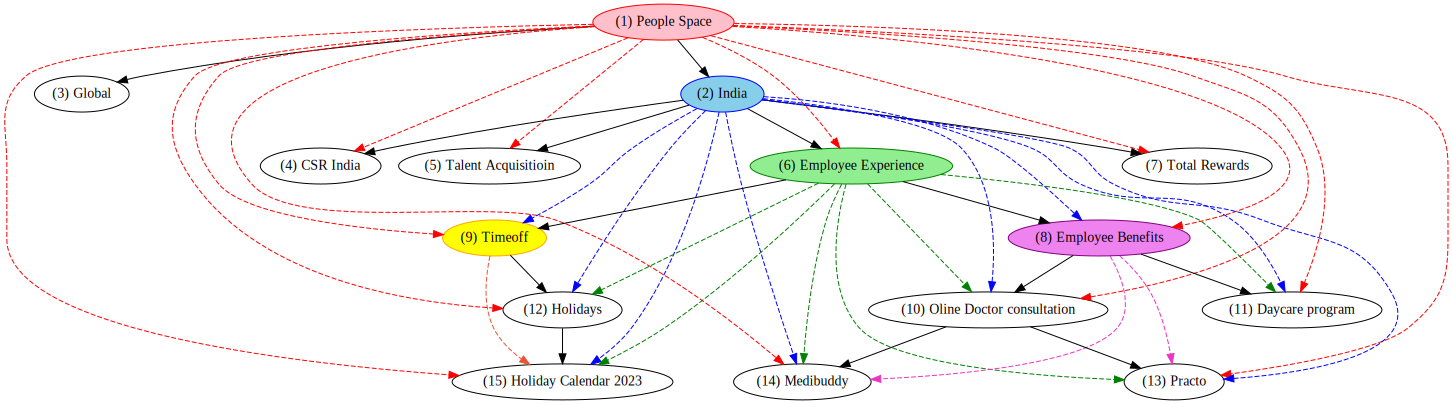

In [10]:
folder_hierarchy = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]
    
    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    
    //Color codes
    ps [color = red, fillcolor=pink, style=filled]

    //Create Edge to all descendents of "People Space"
    ps -> csr [color="red", style="dashed"]
    ps -> ta [color="red", style="dashed"]
    ps -> ee [color="red", style="dashed"]
    ps -> eb [color="red", style="dashed"]
    ps -> odc [color="red", style="dashed"]
    ps -> prc [color="red", style="dashed"]
    ps -> tr [color="red", style="dashed"]
    ps -> dp [color="red", style="dashed"]
    ps -> tof [color="red", style="dashed"]
    ps -> hol [color="red", style="dashed"]
    ps -> hc [color="red", style="dashed"]
    ps -> mb [color="red", style="dashed"]

    //Create Edge to all descendents of "India"
    ind [color = blue, fillcolor=skyblue, style=filled]

    ind -> eb [color="blue", style="dashed"]
    ind -> tof [color="blue", style="dashed"]
    ind -> odc [color="blue", style="dashed"]
    ind -> dp [color="blue", style="dashed"]
    ind -> hol [color="blue", style="dashed"]
    ind -> prc [color="blue", style="dashed"]
    ind -> mb [color="blue", style="dashed"]
    ind -> hc [color="blue", style="dashed"]

    //Create Edge to all descendents of "Employee Experience"
    ee [color = green, fillcolor=lightgreen, style=filled]

    ee -> odc [color="green", style="dashed"]
    ee -> dp [color="green", style="dashed"]
    ee -> hol [color="green", style="dashed"]
    ee -> prc [color="green", style="dashed"]
    ee -> mb [color="green", style="dashed"]
    ee -> hc [color="green", style="dashed"]
    
    //Create Edge to all descendents of "Employee Benefits"
    eb [color = purple, fillcolor=violet, style=filled]

    eb -> prc [color="#eb34c3", style="dashed"]
    eb -> mb [color="#eb34c3", style="dashed"]

    //Create Edge to all descendents of "Timeoff"
    tof [color = orange, fillcolor=yellow, style=filled]

    tof -> hc [color="#eb5234", style="dashed"]
    
}
'''
hierarchy = graphviz.Source(folder_hierarchy)
hierarchy


#### Final mapping - MySQL


| parent | child | height | 
|----------|------------|--------|
| 1| 1| 0 |
| 1 | 2| 1 |
| 1| 3| 1|
| 1 | 4| 2 |
| 1 | 5| 2 |
| 1 | 6| 2 |
| 1 | 7| 2 |
| 1 | 8| 3 |
| 1 | 9| 3 |
| 1 | 10| 4 |
| 1 | 11| 4 |
| 1 | 12| 4 |
| 1 | 13| 5 |
| 1 | 14| 5 |
| 1 | 15| 5 |
| 2| 2| 0 |
| 2 | 4| 1 |
| 2 | 5| 1 |
| 2 | 6| 1|
| 2 | 7| 1|
| 2 | 8| 2 |
| 2 | 9| 2 |
| 2 | 10| 3 |
| 2 | 11| 3 |
| 2 | 12| 3 |
| 2 | 13| 4 |
| 2 | 14| 4 |
| 2 | 15| 4 |
| 3| 3| 0|
| 4| 4| 0|
| 5| 5| 0|
| 6| 6| 0|
| 6| 8| 1|
| 6| 9| 1|
| 6 | 10| 2 |
| 6 | 11| 2 |
| 6 | 12| 2 |
| 6 | 13| 3 |
| 6 | 14| 3 |
| 6 | 15| 3 |
| 7| 7| 0|
| 8| 8| 0|
| 8| 10| 1|
| 8| 11| 1|
| 8 | 13| 2 |
| 8 | 14| 2 |
| 9| 9| 0|
| 9| 12| 1|
| 9 | 15| 2 |
| 10| 10| 0|
| 10| 13| 1|
| 10| 14| 1|
| 11| 11| 0|
| 12| 12| 0|
| 12| 15| 1|
| 13| 13| 0|
| 14| 14| 0|
| 15| 15| 0|
| 16| 16| 0|
| 16| 17| 1|
| 16| 18| 1|
| 17| 17| 0|
| 17| 19| 1|
| 18| 18| 0|
| 19| 19| 0|
| 19| 20| 1|
| 19| 21| 1|
| 20| 20| 0|
| 21| 21| 0|